# Seaborn | Part-3: LM Plot & Reg Plot

Welcome to another lecture on Seaborn! In this lecture, we shall be covering the concept of plotting **Linear Regression** data analysis, which is a very common method in *Business Intelligence*, and *Data Science* domain in particular. 

As our intention isn't to dive deeply into each statistical concept, I shall instead pick a curated dataset and show you different ways in which we can visualize whatever we deduced during our analysis. Using Seaborn, there are two important types of figure that we can plot to fulfil our project needs. One is known as **LM Plot** and the other one is **Reg Plot**. Visualy, they have pretty much similar appearance, but do have functional difference that I will highlight in detail for you to understand.

To begin with, we shall at first try to gain *statistical overview* of the concept of *Linear Regression*. **<span style="color:red">Linear Regression</span>** is a *statistical concept for predictive analytics*, where the core agenda is to majorly examine three aspects:

- Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
- Which variables in particular are significant predictors for the outcome variable?
- In what way do they (indicated by the magnitude and sign of the beta estimates) impact the outcome variable? These **Beta Estimates** are just the *standardized coefficients* resulting from a *regression analysis*, that have been standardized so that the variances of dependent and independent variables are 1.

Let us begin by importing the libraries that we might need in our journey:

In [1]:
# Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="hsv")
import warnings
warnings.filterwarnings("ignore")

Let us now generate some data to play around with using **Numpy** for two imaginary classes of points:

In [5]:
# Loading Built-in Dataset:
tips = sns.load_dataset("tips")

# Fetching preview of Dataset:
tips.head(10)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

## Seaborn Lmplots:

Every plot in Seaborn has a set of fixed parameters. For `sns.lmplot()`, we have three manadatory parameters and the rest are optional that we may use as per our requirements. These 3 parameters are values for X-axis, values for Y-axis and reference to dataset. These 3 are pre-dominantly visible in almost all of Seaborn plots and in addition, there is an optional parameter which I want you to memorize as it comes in very handy. This is **hue** parameter and it takes in categorical columns and kind of helps us to group our data plot as per *hue* parameter values.

Let me show you how it works:

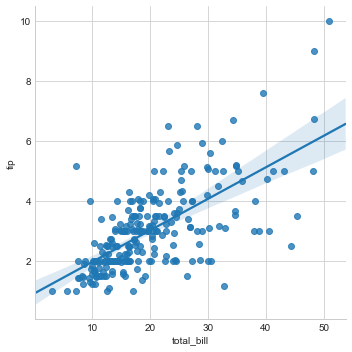

In [6]:
# Basic lmplot visualization:
sns.lmplot(x="total_bill", y="tip", data=tips)

Let us now understand what we see on the screen before we jump into adding parameters. This linear line across our plot is the best available fit for the trend of the tip usually customers give with respect to the total bill that gets generated. And the data points that we see at extreme top right which are far away from this line are known as **outliers** in the dataset. You may think of *outliers* as exceptions.

In this case, looking at this plot, we may say that if the total bill is around $20.00, then it shall get a tip of around $3.00. Let us refine this visualization even further by adding more features to the plot, and for this purpose let us try to understand if a Smoker in general *tip* more or less:

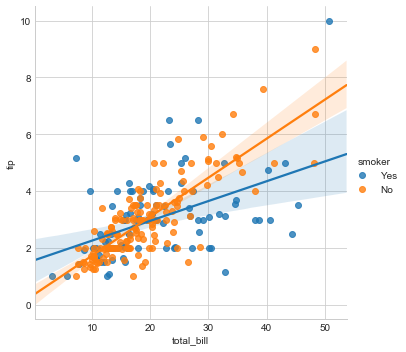

In [7]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

Somehow it refects that Smokers that you may see in blue are little more generous but not so consistent with their tipping mechanism as the data points are quite vaguely spread out. So, addition of the 3rd parameter of **hue** helped us visualize this difference in separate color plotting, and has also added a **legend** with *Yes*, *No* to conveniently interpret.

Let us look into other commonly used parameters to customize this plot further:

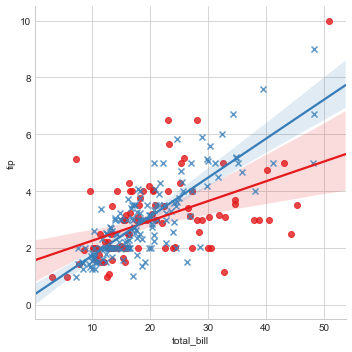

In [9]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"], palette="Set1", legend=False)

Here, we set data point marker style, altered the coloring and decided to remove the legend which by default is always there. Right now, be it for a smoker or for a non-smoker, the representation is on the same plot so let us get it on separate facets:

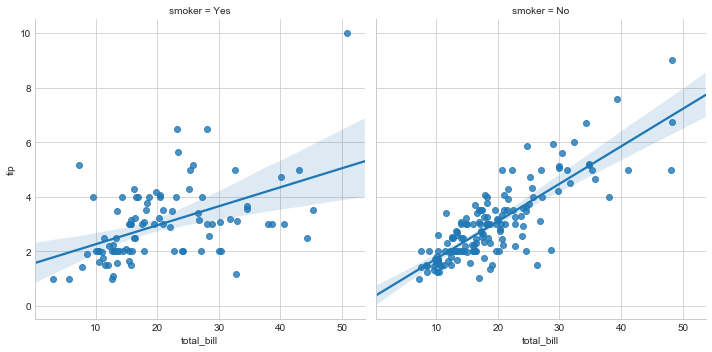

In [12]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)

There is a lot that you may experiment with by using different optional parameters, but in a shell, basic presentation with mandatory arguments remain the same. Let me show you one more on Tips dataset:

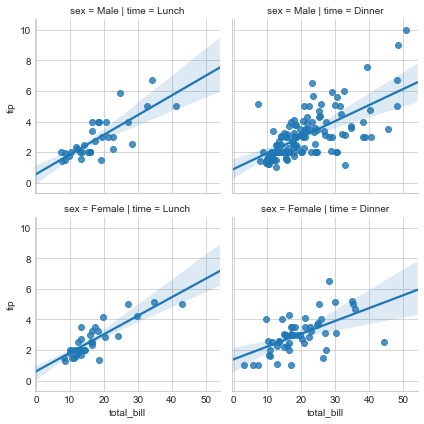

In [15]:
sns.lmplot(x="total_bill", y="tip", palette="magma", row="sex", col="time", data=tips, size=3)

This plot in 4 separate facets drill deeper into visualizing the data, where we still show the tip being given against total bill but is now also segmented into whether it was Lunch time or not along with dependency on Gender. There shall be multiple occassions where you would like to visualize such a deeper segmentation. Currently we have a small dataset so we still have our hands tied but with real-world dataset exploration, this visualization gets limitless.

## Seaborn Regplots:

In terms of core functionality, `reglot()` is pretty similar to `lmplot()` and solves similar purpose of visualizing a linear relationship as determined through Regression. In the simplest invocation, both functions draw a scatterplot of two variables, `x` and `y`, and then fit the regression model `y ~ x`; and plot the resulting regression line and a *95% confidence interval* for that regression. In fact, `regplot()` possesses a subset of `lmplot()'s` features.

Important to note is the difference between these two functions in order to choose the correct plot for your usage.
- Very evident difference is the shape of plot that we shall observe shortly.
- Secondly, [regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html) has mandatory input parameter flexibility. This means that `x` and `y` variables DO NOT necessarily require *strings* as *input*. Unlike `lmplot()`, these two parameters shall also accept other formats like simple *NumPy arrays*, *Pandas Series* objects, or as references to variables in a *Pandas DataFrame* object passed to input data.

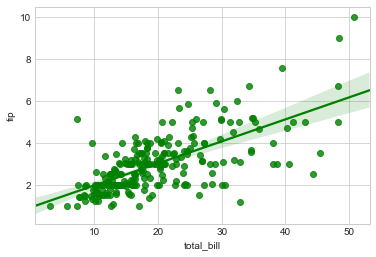

In [45]:
sns.regplot(x="total_bill", y="tip", data=tips, color="g")

Let us also try to plot with *NumPy arrays*:

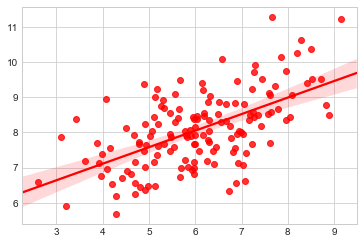

In [54]:
import numpy as np
np.random.seed(8)  # Initializing RandomState
mean, cov = [6, 8], [(1.5, .7), (.7, 1)]  # Mean and Covariance
x, y = np.random.multivariate_normal(mean, cov, 150).T  # Generalizing 1-Dimensional Gaussian distribution to higher dimensions.
sns.regplot(x=x, y=y, color="r")

The datasets we have dealt with till now have data points pretty neatly arranged and hence presenting a logistic fit isn't that cumbersome but let us now look at few complex scenarios. The very first one we are going to deal with is to fit a nonparametric regression using a [lowess smoother](https://en.wikipedia.org/wiki/Local_regression).

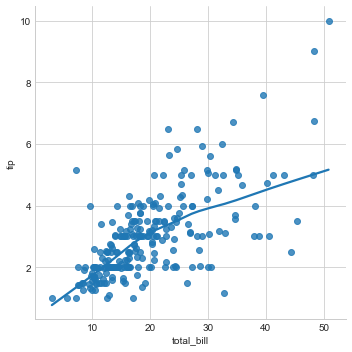

In [55]:
sns.lmplot(x="total_bill", y="tip", data=tips, lowess=True)

This is a *computationally intensive* process as it is robust and hence in the backend it doesn't take `ci` parameter, i.e. *confidence interval* into consideration. Here the line bends around to get more precise estimate as per the spread of data points, as visible. Let us get another built-in dataset available with Seaborn to have a better view of applied Logistic Regression scenarios:

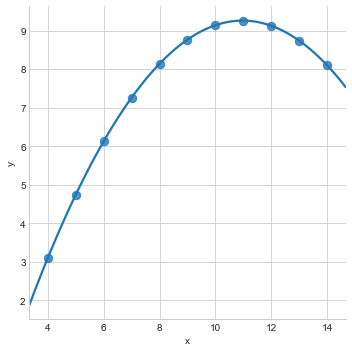

In [58]:
# Loading another Built-in dataset:
anscombe = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=3, ci=None, scatter_kws={"s": 70})

This majorly helps to tackle *Outliers* in our dataset to fit a **polynomial regression model** to explore simple kinds of nonlinear trends because the linear relationship is the same but our simple plot wouldn't have been able to trace it. Let me show how it would have looked:

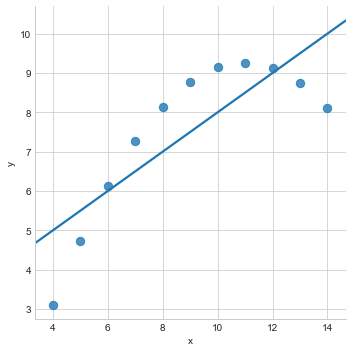

In [59]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 70})

With all that understanding, the only thing I feel I should get you acquainted with are the commonly used optional parameters:
- Parameters like `x_jitter` and `y_jitter` are used to add noise to our dataset.
- `color` parameter helps you get Matplotlib style color.
- `dropna` helps to drop NaN (NULL) values.
- `x_estimator` param is useful with discrete variables.
- `ci` represents the size of Confidence interval used when plotting a [central tendency](https://en.wikipedia.org/wiki/Central_tendency) for discrete values of x.
- `label` is used to assign a suitable name to either our *Scatterplot* (in *legends*) or *Regression line*.

Thank You for your patience throughout this visually exhaustive lecture and hope to see you in the next one! 